In [1]:
import numpy as np
from circuit_knitting.cutting.cut_finding.circuit_interface import SimpleGateList
from circuit_knitting.cutting.cut_finding.lo_cuts_optimizer import LOCutsOptimizer
from circuit_knitting.cutting.cut_finding.optimization_settings import OptimizationSettings
from circuit_knitting.cutting.cut_finding.quantum_device_constraints import DeviceConstraints

## Cut finding for efficient SU(2) Circuit with linear entanglement

### Visualize the circuit

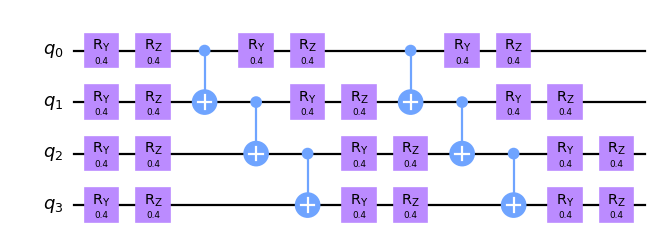

In [2]:
from qiskit.circuit.library import EfficientSU2
from circuit_knitting.cutting.cut_finding.utils import QCtoCCOCircuit

qc = EfficientSU2(4, entanglement="linear", reps=2).decompose()
qc.assign_parameters([0.4] * len(qc.parameters), inplace=True)

circuit_ckt=QCtoCCOCircuit(qc)

qc.draw("mpl", scale=0.8)




### Perform cut finding

In [3]:
settings = OptimizationSettings(rand_seed = 12345)

settings.setEngineSelection('CutOptimization', 'BestFirst')


qubits_per_QPU=4
num_QPUs=2



for num_qpus in range(num_QPUs, 1, -1):
    for qpu_qubits in range(qubits_per_QPU, 1, -1):
        print(f'\n\n---------- {qpu_qubits} Qubits per QPU, {num_qpus} QPUs ----------')
        
        constraint_obj = DeviceConstraints(qubits_per_QPU = qpu_qubits, 
                                            num_QPUs       = num_QPUs)
        
        interface = SimpleGateList(circuit_ckt)

        op = LOCutsOptimizer(interface, 
                        settings, 
                        constraint_obj)
        
        out = op.optimize()

        print(' Gamma =', None if (out is None) else out.upperBoundGamma(),
              ', Min_gamma_reached =', op.minimumReached())
        if (out is not None):
            out.print(simple=True)
        else:
            print(out)
    
        print('Subcircuits:', interface.exportSubcircuitsAsString(name_mapping='default'),'\n')




---------- 4 Qubits per QPU, 2 QPUs ----------
 Gamma = 1.0 , Min_gamma_reached = True
None
Subcircuits: AAAA 



---------- 3 Qubits per QPU, 2 QPUs ----------
 Gamma = 9.0 , Min_gamma_reached = True
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [17, CircuitElement(name='cx', params=[], qubits=[2, 3], gamma=3.0)]}]
Subcircuits: AAAB 



---------- 2 Qubits per QPU, 2 QPUs ----------
 Gamma = 9.0 , Min_gamma_reached = True
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [9, CircuitElement(name='cx', params=[], qubits=[1, 2], gamma=3.0)]}]
Subcircuits: AABB 



## Cut finding for 7 qubit circuit

### Visualize the circuit

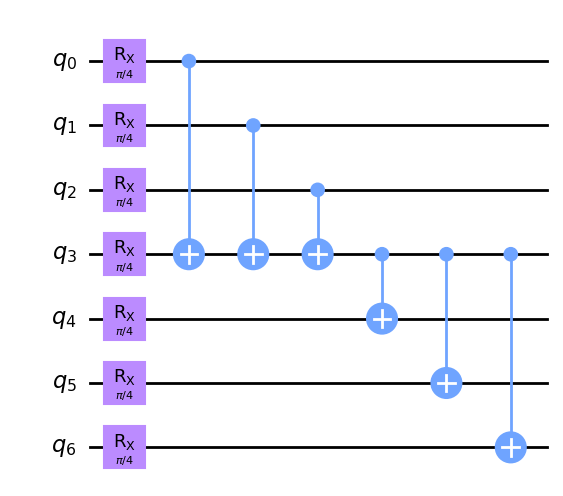

In [4]:
from qiskit import QuantumCircuit
qc_0 = QuantumCircuit(7)
for i in range(7):
    qc_0.rx(np.pi / 4, i)
qc_0.cx(0, 3)
qc_0.cx(1, 3)
qc_0.cx(2, 3)
qc_0.cx(3, 4)
qc_0.cx(3, 5)
qc_0.cx(3, 6)

qc_0.draw("mpl")

### Perform cut finding

In [5]:
from circuit_knitting.cutting.cut_finding.utils import QCtoCCOCircuit

circuit_ckt_wirecut=QCtoCCOCircuit(qc_0)

settings = OptimizationSettings(rand_seed = 12345)

settings.setEngineSelection('CutOptimization', 'BestFirst')

qubits_per_QPU=7
num_QPUs=2



for num_qpus in range(num_QPUs, 1, -1):
    for qpu_qubits in range(qubits_per_QPU, 1, -1):
        print(f'\n\n---------- {qpu_qubits} Qubits per QPU, {num_qpus} QPUs ----------')
        
        constraint_obj = DeviceConstraints(qubits_per_QPU = qpu_qubits, 
                                            num_QPUs      = num_QPUs)

        interface = SimpleGateList(circuit_ckt_wirecut)
        
        op = LOCutsOptimizer(interface, 
                        settings, 
                        constraint_obj)
        
        out = op.optimize()

        print(' Gamma =', None if (out is None) else out.upperBoundGamma(),
              ', Min_gamma_reached =', op.minimumReached())
        if (out is not None):
            out.print(simple=True)
        else:
            print(out)

        print('Subcircuits:', interface.exportSubcircuitsAsString(name_mapping='default'),'\n')



---------- 7 Qubits per QPU, 2 QPUs ----------
 Gamma = 1.0 , Min_gamma_reached = True
None
Subcircuits: AAAAAAA 



---------- 6 Qubits per QPU, 2 QPUs ----------
 Gamma = 3.0 , Min_gamma_reached = True
[{'Cut action': 'CutTwoQubitGate', 'Cut Gate': [12, CircuitElement(name='cx', params=[], qubits=[3, 6], gamma=3.0)]}]
Subcircuits: AAAAAAB 



---------- 5 Qubits per QPU, 2 QPUs ----------
 Gamma = 4.0 , Min_gamma_reached = True
[{'Cut action': 'CutLeftWire', 'Cut location:': {'Gate': [11, CircuitElement(name='cx', params=[], qubits=[3, 5], gamma=3.0)]}, 'Input wire': 1}]
Subcircuits: AAAABABB 



---------- 4 Qubits per QPU, 2 QPUs ----------
 Gamma = 4.0 , Min_gamma_reached = True
[{'Cut action': 'CutLeftWire', 'Cut location:': {'Gate': [10, CircuitElement(name='cx', params=[], qubits=[3, 4], gamma=3.0)]}, 'Input wire': 1}]
Subcircuits: AAAABBBB 



---------- 3 Qubits per QPU, 2 QPUs ----------
 Gamma = 16.0 , Min_gamma_reached = True
[{'Cut action': 'CutRightWire', 'Cut location